## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())


249

In [3]:
duplicateMouse = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


print("Duplicate Rows based on a single column are:", duplicateMouse, sep='\n')

Duplicate Rows based on a single column are:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#clean_df.describe()
means = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variances = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
sds = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sems = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean": means,
                              "Median": medians,
                              "Variance": variances,
                              "STD":sds,
                              "SEM":sems  
    
})

summary_table
                                     

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_table2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var","std","sem"]})
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice')

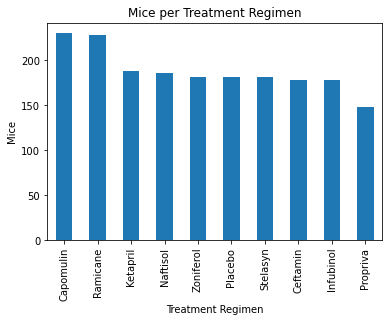

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counts = clean_df["Drug Regimen"].value_counts()

counts.plot(kind = "bar")
plt.title('Mice per Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Mice')

Text(0, 0.5, 'Mice')

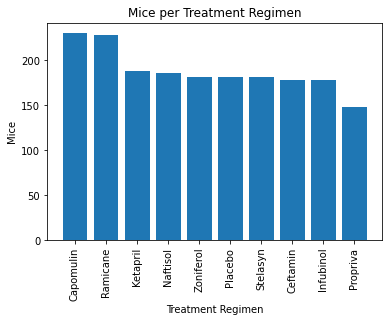

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(counts.index.values, counts.values)
plt.xticks(rotation = 90)
plt.title('Mice per Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Mice')

In [11]:
#clean_gender_df = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"]
genders = mouse_metadata['Sex'].value_counts() 
genders

Male      125
Female    124
Name: Sex, dtype: int64

(-1.1000791940320744,
 1.1016630746735625,
 -1.1009347297692742,
 1.1017685314144794)

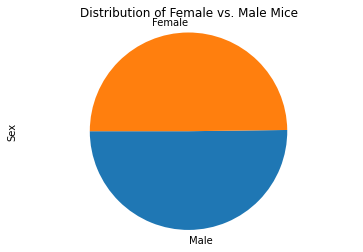

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders.plot(kind = "pie", startangle=180)
plt.title('Distribution of Female vs. Male Mice')
plt.axis("equal")

(-1.1000791940320744,
 1.1016630746735625,
 -1.1009347297692742,
 1.1017685314144794)

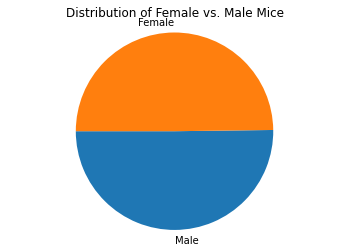

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genders.values, labels = genders.index.values, startangle=180)
plt.title('Distribution of Female vs. Male Mice')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = clean_df.groupby("Mouse ID").max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = final_tumor_volume[["Mouse ID", "Timepoint"]].merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left" )

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]



In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:
    print(treatment)
    df  = merge_df.loc[merge_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = df.quantile([0.25, 0.5, 0.75])
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
       
    # Determine outliers using upper and lower bounds
    print(f'outliers for {treatment} : {df.loc[(df<lower) | (df > upper)]}')

Capomulin
outliers for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
outliers for Infubinol : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
outliers for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

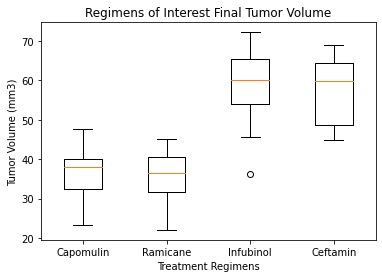

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title('Regimens of Interest Final Tumor Volume')
plt.xlabel('Treatment Regimens')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

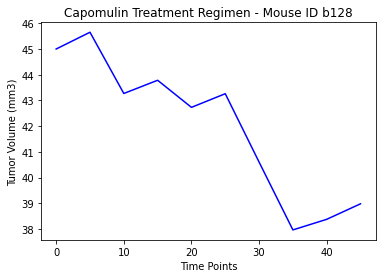

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = combined_df.loc[combined_df["Mouse ID"] == "b128"]
mouse_df = mouse_df.set_index("Mouse ID")
mouse_df

timepoint = mouse_df["Timepoint"]
tumorvolume = mouse_df["Tumor Volume (mm3)"]

one_mouse = plt.plot(timepoint, tumorvolume, color="blue", label="Tumor Volume (mm3)" )
plt.title('Capomulin Treatment Regimen - Mouse ID b128')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


In [18]:
mouse_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,0,45.000000,0
b128,Capomulin,Female,9,22,5,45.651331,0
b128,Capomulin,Female,9,22,10,43.270852,0
b128,Capomulin,Female,9,22,15,43.784893,0
b128,Capomulin,Female,9,22,20,42.731552,0
b128,Capomulin,Female,9,22,25,43.262145,1
b128,Capomulin,Female,9,22,30,40.605335,1
b128,Capomulin,Female,9,22,35,37.967644,1
b128,Capomulin,Female,9,22,40,38.379726,2


In [19]:
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

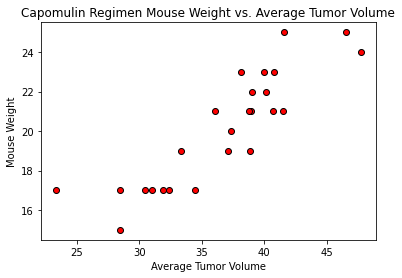

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
weight = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]["Weight (g)"].values

#plt.scatter(mouse_df.iloc[:,6],mouse_df.iloc[:,4])
plt.scatter(average_tumor, weight, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Capomulin Regimen Mouse Weight vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_tumor, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


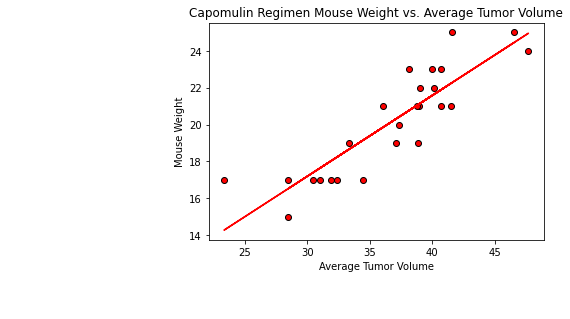

In [22]:
x_values = average_tumor
y_values = weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Capomulin Regimen Mouse Weight vs. Average Tumor Volume')
plt.show()